      First Data File
1           گلگیر اصل
2    روغن موتور لیفان
3  آینه بغل لیفان 520
4         تایر  ماشین
5   گلگیر ماشین Lifan
6                 سپر
7  آفتامات دینام جیلی
          Second Data File
1              گلگیر لیفان
2         روغن موتور lifan
3  آفتامات دینام لیفان ۵۲۰
4            گلگیر orginal
5                 تایر جلو
6                     شاسی
7  آینه بغل راست لیفان ۵۲۰
['گلگیر اصل', 'روغن موتور لیفان', 'آینه بغل لیفان 520', 'تایر  ماشین', 'گلگیر ماشین Lifan', 'سپر', 'آفتامات دینام جیلی']
['گلگیر لیفان', 'روغن موتور lifan', 'آفتامات دینام لیفان ۵۲۰', 'گلگیر orginal', 'تایر جلو', 'شاسی', 'آینه بغل راست لیفان ۵۲۰']
Product 'گلگیر اصل' from first data file with 'گلگیر لیفان' from second data file are similar (Similarity: 64.0%)
Product 'گلگیر اصل' from first data file with 'گلگیر orginal' from second data file are similar (Similarity: 96.3%)
Product 'روغن موتور لیفان' from first data file with 'گلگیر لیفان' from second data file are similar (Similarity: 51.85%)
Product 

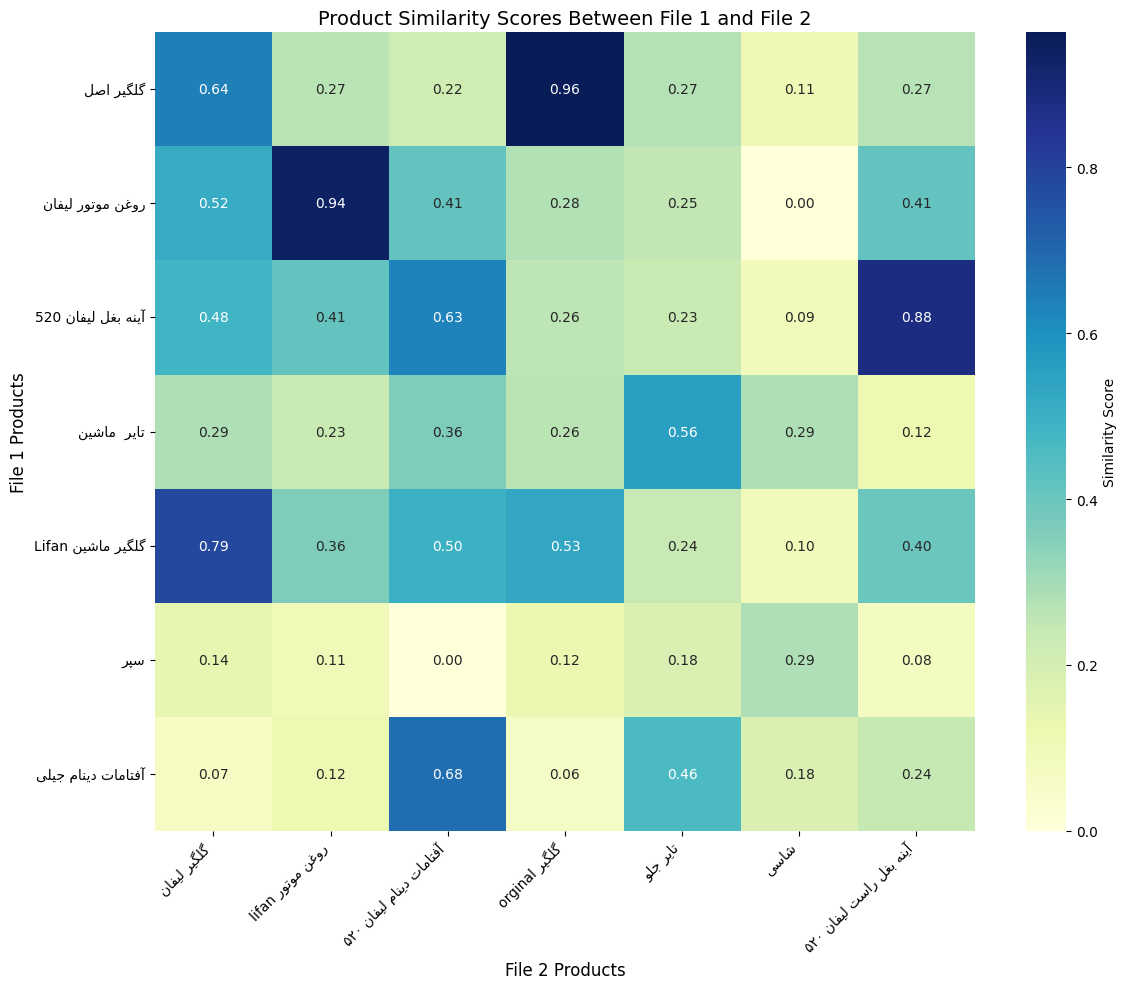

In [1]:
#Part ONE (Required libraries):
import difflib 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm  # Import the font manager
from bidi.algorithm import get_display
import arabic_reshaper

# Part TWO (Load product lists from two Excel files):
data1 = pd.read_excel('data1.xlsx', header=None, names=["First Data File"])
data2 = pd.read_excel('data2.xlsx', header=None, names=["Second Data File"])
data1.index = data1.index + 1 # Shifts the data indexing from default 0 to 1 
data2.index = data2.index + 1
print(data1)
print(data2)

# Part Three (Conversion to List format):
file1_products = data1.iloc[:, 0].tolist()  
file2_products = data2.iloc[:, 0].tolist() 
print(file1_products)
print(file2_products)


# Part Four (Defined Function):
## Creating dictionary of tranlated words)
translation_dict = {
    'اصل': 'original',
    'لیفان': 'Lifan'
} 
## Creating Dictionary of Persian numerals to English numeral
persian_to_english_digits = {
    '\u06F0': '0',  # Persian 0
    '\u06F1': '1',  # Persian 1
    '\u06F2': '2',  # Persian 2
    '\u06F3': '3',  # Persian 3
    '\u06F4': '4',  # Persian 4
    '\u06F5': '5',  # Persian 5
    '\u06F6': '6',  # Persian 6
    '\u06F7': '7',  # Persian 7
    '\u06F8': '8',  # Persian 8
    '\u06F9': '9'   # Persian 9
}

## Creating function to convert Persian numbers to English number
def convert_numbers(text):
    return ''.join(persian_to_english_digits.get(char, char) for char in text)

## Creating function that does both translation and number conversion
def translate_and_convert_product(product):
    ### Convert numbers
    converted_product = convert_numbers(product)
    
    ### Translate based on the dictionary
    words = converted_product.split()
    translated_words = [translation_dict.get(word, word) for word in words]
    return ' '.join(translated_words)

# Part Five (Define function that measure the similaruty)
## Creating Function to find similar products using difflib
def find_similar_products(list1, list2, threshold=0.5):
    similar_products = []
    scores = []
    
    for product1 in list1:
        translated_product1 = translate_and_convert_product(product1)
        row_scores = []
        
        for product2 in list2:
            translated_product2 = translate_and_convert_product(product2)
            similarity_ratio = difflib.SequenceMatcher(None, translated_product1, translated_product2).ratio()
            row_scores.append(similarity_ratio)
            if similarity_ratio >= threshold:
                similar_products.append((product1, product2, round(similarity_ratio * 100, 2)))
        scores.append(row_scores)
    
    return similar_products, scores

## Find similar products and prepare the percentage:
similar_products, similarity_scores = find_similar_products(file1_products, file2_products)

##Print the result (Display similar products):
for product1, product2, similarity_ratio in similar_products:
    print(f"Product '{product1}' from first data file with '{product2}' from second data file are similar (Similarity: {similarity_ratio}%)")

# Part Six (Visualization via Heatmap)
## Function to display Persian text for right to left
def reshape_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text) 
    
## Apply reshaping to axis labels
file1_products = [reshape_text(product) for product in file1_products]
file2_products = [reshape_text(product) for product in file2_products]

df_similarity = pd.DataFrame(similarity_scores, index=file1_products, columns=file2_products)

## Create a DataFrame of similarity score for Heatmap
df_similarity = pd.DataFrame(similarity_scores, index=file1_products, columns=file2_products)

## Plot the Heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(df_similarity, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Similarity Score'})

plt.title("Product Similarity Scores Between File 1 and File 2", fontsize=14)
plt.xlabel("File 2 Products", fontsize=12)
plt.ylabel("File 1 Products", fontsize=12)

## Adjusting plot
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, va='center', fontsize=10)

plt.tight_layout()
plt.show()
